In [59]:
# Computational imports
import numpy as np
import math
from scipy import optimize as opt
# from numba import njit

# Graphics imports
import matplotlib.pyplot as plt
from matplotlib import cm # for 3d poltting
from mpl_toolkits.mplot3d.axes3d import Axes3D # for 3d poltting

In [76]:
def fa(x, a, c):
    exponent = (-2*(x-a))/c
    denom = 1 + (math.e**(exponent))
    return 1/denom

def f(x):
    return fa(x,1,0.005)

# \frac{1}{1+e^{-\frac{2\left(x-b\right)}{-c}}}


def scale_up(z,x_min,x_max):
    """
    Scales up z \in [-1,1] to x \in [x_min,x_max]
    where z = (2 * (x - x_min) / (x_max - x_min)) - 1
    """
    
    return x_min + (z + 1) * (x_max - x_min) / 2


def scale_down(x,x_min,x_max):
    """
    Scales down x \in [x_min,x_max] to z \in [-1,1]
    where z = f(x) = (2 * (x - x_min) / (x_max - x_min)) - 1
    """    
    
    return (2 * (x - x_min) / (x_max - x_min)) - 1

In [96]:
x_min = -10
x_max = 20
x_grid = np.linspace(x_min,x_max,100)

<ipython-input-76-dc5249b907c0>:3: RuntimeWarning: overflow encountered in power
  denom = 1 + (math.e**(exponent))


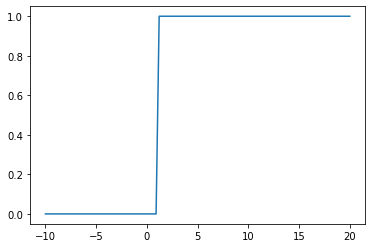

In [97]:
plt.figure()
plt.plot(x_grid,f(x_grid))
plt.show()
plt.close()

In [104]:
n = 10 # order (degree, highest power) of the approximating polynomial
m = 30 # number of Chebyshev nodes (having m > n doesn't matter for the approximation it seems)

# generate chebyshev nodes (the roots of Chebyshev polynomials, a Chebyshev polynomial of degree m-1 has m roots)
r_k = -np.cos((2*np.arange(1,m+1) - 1) * np.pi / (2*m))

# or using numpy's routine
#r_k = np.polynomial.chebyshev.chebpts1(m)

In [105]:

# builds the Vandermonde matrix of Chebyshev polynomial expansion at the r_k nodes
# using the recurrence relation
T = np.zeros((m,n+1))

T[:,0] = np.ones((m,1)).T

T[:,1] = r_k.T

for i in range(1,n):
    T[:,i+1] = 2 * r_k * T[:,i] - T[:,i-1]

# or numpy's routine
#T = np.polynomial.chebyshev.chebvander(r_k,n) 

In [106]:
# calculate the Chebyshev coefficients
x_k = scale_up(r_k,x_min,x_max)
y_k = f(x_k)
α = np.linalg.inv(T.T @ T) @ T.T @ y_k
α

<ipython-input-76-dc5249b907c0>:3: RuntimeWarning: overflow encountered in power
  denom = 1 + (math.e**(exponent))


array([ 6.00000000e-01,  6.05738123e-01, -1.87440254e-01, -1.25246324e-01,
        1.52477640e-01, -1.52655666e-16, -1.02589451e-01,  5.46724163e-02,
        4.81708301e-02, -6.98293993e-02,  6.93889390e-17])

In [107]:
# evaluate the Chebyshev series with coefficients α_k at the points r_k
T @ α

# or with numpy's routine
#np.polynomial.chebyshev.chebval(r_k,α)

array([ 3.91437846e-02, -9.06456802e-04, -4.19367677e-02, -4.19367677e-02,
        3.47819367e-03,  5.27676412e-02,  5.27676412e-02, -1.04732634e-02,
       -8.67120833e-02, -8.67120833e-02,  5.70422612e-02,  3.37995346e-01,
        6.71328680e-01,  9.42873651e-01,  1.07713368e+00,  1.07713368e+00,
        1.01074525e+00,  9.57634174e-01,  9.57634174e-01,  9.95991837e-01,
        1.02992763e+00,  1.02992763e+00,  1.00185964e+00,  9.75766095e-01,
        9.75766095e-01,  9.99130900e-01,  1.02158753e+00,  1.02158753e+00,
        1.00025799e+00,  9.79196370e-01])

In [108]:
T = np.zeros((len(x_grid),n+1))

T[:,0] = np.ones((len(x_grid),1)).T

z_grid = scale_down(x_grid,x_min,x_max)

T[:,1] = z_grid.T

for i in range(1,n):
    T[:,i+1] = 2 * z_grid * T[:,i] - T[:,i-1]

# compute approximation
Tf = T @ α

<ipython-input-76-dc5249b907c0>:3: RuntimeWarning: overflow encountered in power
  denom = 1 + (math.e**(exponent))


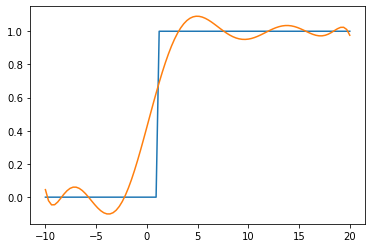

In [109]:
plt.figure()
plt.plot(x_grid,f(x_grid))
plt.plot(x_grid, Tf)
plt.show()
plt.close()